In [294]:
import os
import cv2

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [296]:
class_list = os.listdir('data/')
class_list.remove('.DS_Store')
class_list

['dogs', 'cats', 'bike', 'flowers', 'horses', 'cars', 'human']

In [297]:
class_dict = dict(zip(class_list, list(range(0,len(class_list)))))
class_dict

{'dogs': 0,
 'cats': 1,
 'bike': 2,
 'flowers': 3,
 'horses': 4,
 'cars': 5,
 'human': 6}

In [298]:
len(image_array)

1803

In [299]:
image_list = []


for cls in class_list:
    images = os.listdir('data/' + cls)
    for i in images:
        img = cv2.imread('data/' + cls + '/' + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(128,128))
        image_list.append(img)
image_array = np.array(image_list)
image_array = image_array.astype('float32')
image_array /= 255

In [300]:
print(type(image_array))
print(image_array.dtype)
print(image_array.shape)

<class 'numpy.ndarray'>
float32
(1803, 128, 128)


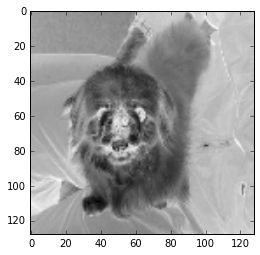

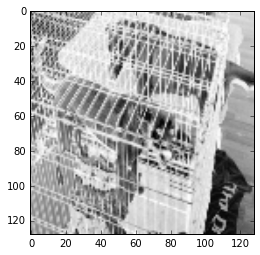

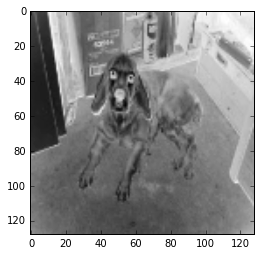

In [281]:
for i in range (0,3):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    plt.show()

In [282]:
# image_array = np.expand_dims(image_array, axis=3) 
image_array.shape

(1803, 128, 128)

In [284]:
def get_labels():
    labels = np.ones((image_array.shape[0]), dtype='int')
    count=0
    for cls in class_list:
        images = os.listdir('data/' + cls)
        labels[count:(len(images)+count)] = class_dict[cls]
        count += len(images)
#         print(len(images))
#         print(count)
    return labels

labels = get_labels()

{'dogs': 0, 'cats': 1, 'bike': 2, 'flowers': 3, 'horses': 4, 'cars': 5, 'human': 6}


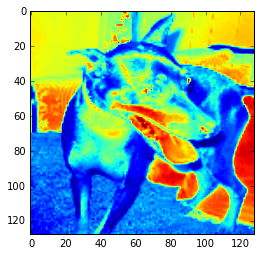

In [286]:
print(class_dict)

for i in range (200,202):
    display(plt.imshow(image_array[i]))

0

dogs


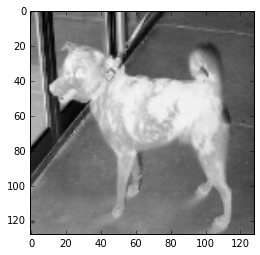

dogs


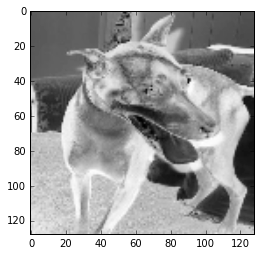

cats


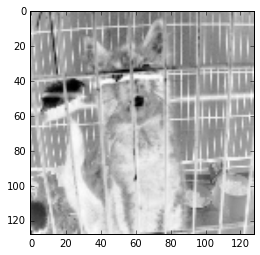

cats


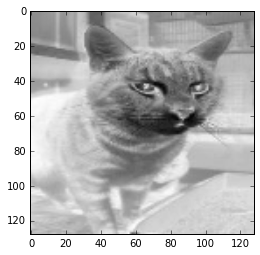

bike


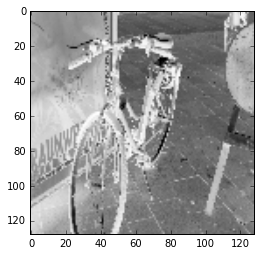

bike


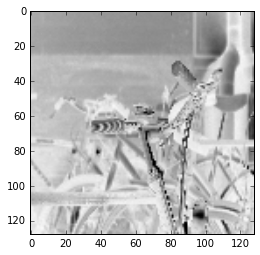

flowers


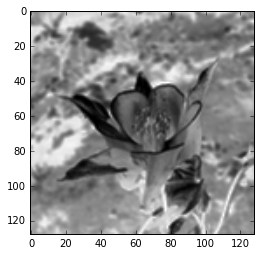

flowers


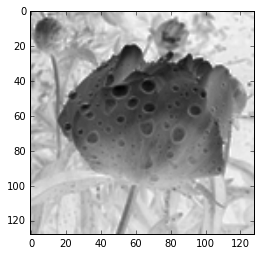

horses


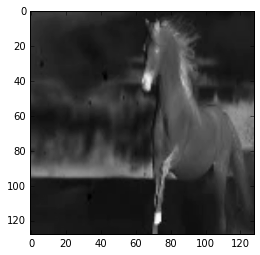

horses


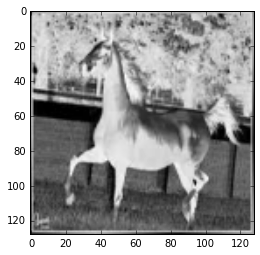

cars


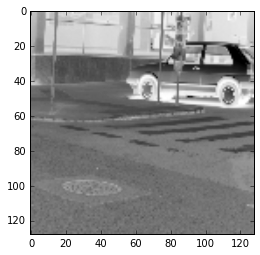

cars


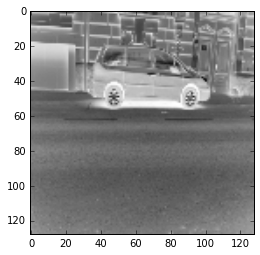

human


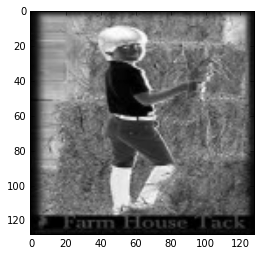

human


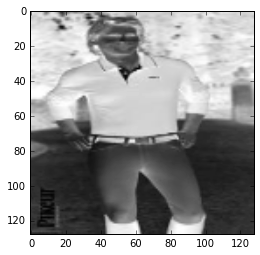

In [292]:
# Dog0 0-202

for i in range (200,202):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Cat1 202-404

for i in range (402,404):
    plt.imshow(image_array[i], cmap=plt.cm.binary)
    print(class_list[labels[i]])
    plt.show()

# Bike2 404-769

for i in range (767,769):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Flower3 769-976

for i in range (974,976):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Horse4 976-1181

for i in range (1179,1181):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Car5 1181-1601

for i in range (1599,1601):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])   
    plt.show()

# Human6 1601-1803

for i in range (1801,1803):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

(1803, 16384)


In [301]:
from keras.utils import np_utils

y = np_utils.to_categorical(labels, len(class_list))

length_counts = []

for i in y:
    if len(i) not in length_counts:
        length_counts.append(len(i))
length_counts

[7]

In [302]:
X_train, X_test, y_train, y_test = train_test_split(image_array, y, test_size=0.2, random_state=42, shuffle=True)

cars


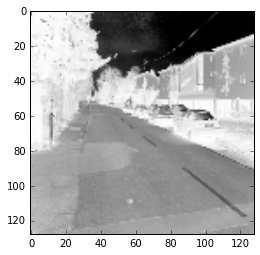

cars


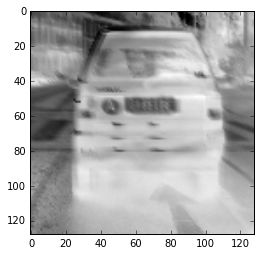

bike


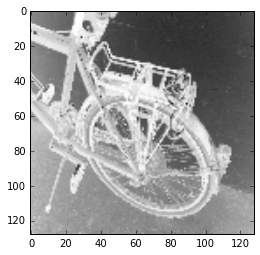

flowers


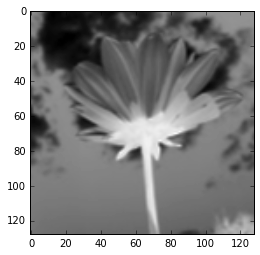

flowers


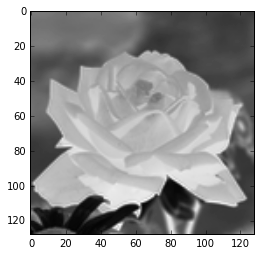

In [306]:
import random
for i in range(0,5):
    n = random.randint(1,len(X_train))
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    class_index = int(np.flatnonzero(y_train[i]))
    print(class_list[class_index])
    plt.show()

In [308]:
# Flatten

X_train = X_train.reshape(len(X_train), 128**2).astype('float32')
X_test = X_test.reshape(len(X_test), 128**2).astype('float32')

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 16384)
X_test shape = (361, 16384)


X_train shape = (1442, 128, 128)
X_test shape = (361, 128, 128)


In [311]:
input_shape=image_array[0].shape
# input_shape = image_array.shape[0]
input_shape

(128, 128)

In [312]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import Conv2D

cnn_model = Sequential([
    Conv2D(32,1,1,padding='same',activation='relu',input_shape = input_shape),
    Conv2D(32,1,1,activation='relu'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.5),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(len(class_list),activation = 'softmax')
])

ValueError: Input 0 of layer "conv2d_34" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 128, 128)

In [121]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=["accuracy"])


In [122]:
cnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 32)      64        
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 32)      1056      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_15 (Flatten)        (None, 131072)            0         
                                                                 
 dense_30 (Dense)            (None, 128)               16777344  
                                                     

In [123]:
num_channel=1
num_epoch=100

In [124]:
hist = cnn_model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

Epoch 1/100


2022-05-13 16:15:31.996683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - ETA: 0s - loss: 1.9121 - accuracy: 0.2136

2022-05-13 16:15:39.873857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


91/91 [==============================] - 9s 90ms/step - loss: 1.9121 - accuracy: 0.2136 - val_loss: 1.8958 - val_accuracy: 0.2382
Epoch 2/100
91/91 [==============================] - 8s 87ms/step - loss: 1.8988 - accuracy: 0.2309 - val_loss: 1.8863 - val_accuracy: 0.2382
Epoch 3/100
91/91 [==============================] - 8s 87ms/step - loss: 1.8780 - accuracy: 0.2427 - val_loss: 1.8771 - val_accuracy: 0.2382
Epoch 4/100
91/91 [==============================] - 8s 87ms/step - loss: 1.8746 - accuracy: 0.2358 - val_loss: 1.8754 - val_accuracy: 0.2410
Epoch 5/100
91/91 [==============================] - 8s 87ms/step - loss: 1.8659 - accuracy: 0.2413 - val_loss: 1.8700 - val_accuracy: 0.2410
Epoch 6/100
91/91 [==============================] - 8s 87ms/step - loss: 1.8638 - accuracy: 0.2476 - val_loss: 1.8638 - val_accuracy: 0.2493
Epoch 7/100
91/91 [==============================] - 8s 88ms/step - loss: 1.8497 - accuracy: 0.2552 - val_loss: 1.8577 - val_accuracy: 0.2576
Epoch 8/100
91/91 

91/91 [==============================] - 8s 85ms/step - loss: 1.6568 - accuracy: 0.3793 - val_loss: 1.7270 - val_accuracy: 0.3269
Epoch 59/100
91/91 [==============================] - 8s 86ms/step - loss: 1.6536 - accuracy: 0.3814 - val_loss: 1.7247 - val_accuracy: 0.3324
Epoch 60/100
91/91 [==============================] - 8s 85ms/step - loss: 1.6526 - accuracy: 0.3883 - val_loss: 1.7231 - val_accuracy: 0.3352
Epoch 61/100
91/91 [==============================] - 8s 85ms/step - loss: 1.6572 - accuracy: 0.3766 - val_loss: 1.7224 - val_accuracy: 0.3324
Epoch 62/100
91/91 [==============================] - 8s 86ms/step - loss: 1.6464 - accuracy: 0.3814 - val_loss: 1.7237 - val_accuracy: 0.3269
Epoch 63/100
91/91 [==============================] - 8s 85ms/step - loss: 1.6493 - accuracy: 0.3897 - val_loss: 1.7199 - val_accuracy: 0.3324
Epoch 64/100
91/91 [==============================] - 8s 86ms/step - loss: 1.6483 - accuracy: 0.3911 - val_loss: 1.7224 - val_accuracy: 0.3407
Epoch 65/100

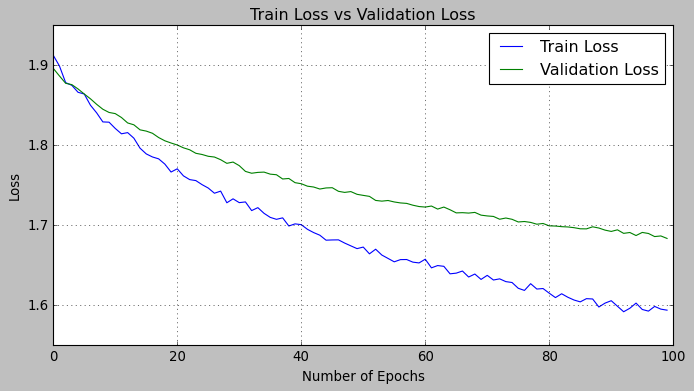

In [127]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

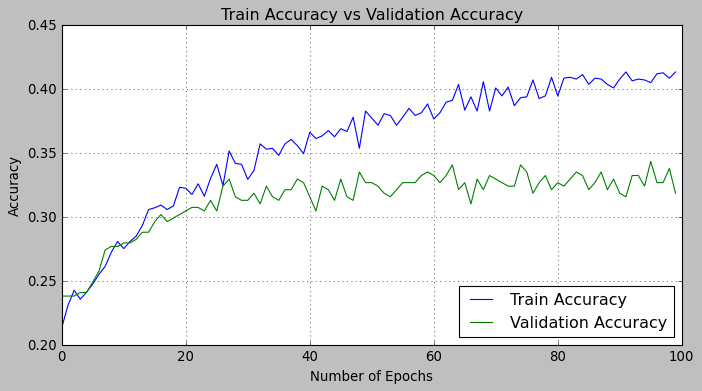

In [128]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [129]:

score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.6832023859024048
Test Accuracy: 0.31855958700180054


(1, 128, 128, 1)
[[0.11655471 0.1068163  0.22098412 0.05518344 0.07943502 0.3362605
  0.08476586]]
[[0. 0. 1. 0. 0. 0. 0.]]


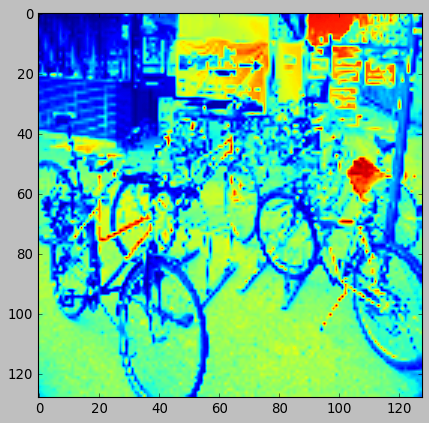

In [132]:
test_image = X_test[0:1]
print (test_image.shape)
print(cnn_model.predict(test_image))
# print(cnn_model.predict(test_image))
print(y_test[0:1])

image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [137]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
print(class_dict)
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=class_dict))

[[0.11655445 0.10681616 0.22098428 ... 0.0794349  0.33626083 0.08476577]
 [0.10221763 0.12092841 0.15241563 ... 0.04859864 0.48836157 0.06894815]
 [0.10325553 0.08405035 0.16635409 ... 0.1135431  0.4111106  0.08697177]
 ...
 [0.1211182  0.10428379 0.17079608 ... 0.21529967 0.2514876  0.07722252]
 [0.13135135 0.12780635 0.15166667 ... 0.09477636 0.31163523 0.12304331]
 [0.14840831 0.11583582 0.17458533 ... 0.06352971 0.28403464 0.0607159 ]]
[5 5 5 5 2 5 5 5 3 5 5 5 4 5 5 5 6 5 4 5 5 5 5 5 5 2 3 6 5 3 5 2 6 5 5 6 2
 5 5 5 5 5 5 3 5 5 6 5 5 2 5 3 5 5 5 2 5 5 2 3 5 5 5 5 5 5 3 5 5 5 5 3 5 3
 5 6 5 3 5 4 5 5 3 6 2 5 5 5 5 5 5 5 5 3 5 5 6 5 4 5 5 5 5 5 5 3 5 3 5 5 3
 5 5 5 5 5 5 5 5 5 2 5 5 3 2 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 2 5 3 5 5 2 5
 5 5 3 5 5 3 5 5 5 3 5 5 5 6 5 5 6 5 5 5 3 5 3 5 5 5 5 5 5 5 6 5 5 5 5 5 5
 3 5 5 6 5 5 5 6 5 5 3 2 5 5 5 5 5 3 5 3 5 5 5 5 2 2 5 5 5 5 5 5 6 3 3 5 2
 5 5 5 3 3 5 6 3 3 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 3 5 5 5 5 5 2 5
 5 5 6 3 5 5 3 5 2 5 5 5 3 5 5 

/Users/henrygc/miniforge3/envs/deep-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henrygc/miniforge3/envs/deep-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/henrygc/miniforge3/envs/deep-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_